In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 13
plt.rcParams['axes.spines.right'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.top'] = False

## Modelos de Máxima Entropía

Un modelo de máxima entropía es aquel que hace las minimas suposiciones como sea posible sin dejar de cumplir algunas restricciones. Estas restricciones a veces se interpretan como características, pero en la práctica generalmente corresponden a restriccion en los momentos de la distribucion. Es decir, buscamos un modelo de distribución que tenga máxima entropía:
$$

\begin{equation}
 H = - \sum_i p(x_i) \log \left( p(x_i) \right)
\end{equation}
$$


pero eso también tiene los mismos momentos que nuestra muestra. Esto se logra mediante el método de multiplicadores de Lagrange, que maximiza un funcional que depende de las restricciones como:

$$
\begin{equation}
 \tilde{H} = - \sum_i p(x_i) \log ( p(x_i) ) + \lambda_0 ( ( \sum_i p(x_i) ) - 1 ) + \sum_k \lambda_k ( ( \sum_i p(x_i) f_k(x_i) ) - \sum_i p_\mathrm{emp.}(x_i) f_k(x_i) ).
\end{equation}
$$

donde $ (\sum_i p (x_i)) - 1 $ deriva de todas las probabilidades sumando hasta uno y $ \sum_i p (x_i) f_k (x_i) - \sum_i p_\mathrm{emp.} (x_i) f_k (x_i) $ de momentos coincidentes. El momento real viene dado por $ f $, y la coincidencia, por ejemplo, la media corresponde a tener $ f (x) = x $. Por lo tanto, se puede encontrar un modelo de entropía máximo (distribución) maximizando $ \tilde{H} $ con respecto tanto a $ p $ como a $ \lambda $'s. Esto puede parecer complicado al principio, pero como la función de entropía es convexa y las restricciones afines (en $ p $), este es realmente un problema de optimización convexo. El optima global se puede encontrar ajustando el gradiente a cero. Para la mayoría de los casos, sin embargo, no existe una solución de forma cerrada y se necesitan rutinas de optimización numérica, pero, sin embargo, es posible derivar analíticamente la forma de $ p $. 


Las derivadas parciales para cada $ p(x_i) $ están dadas por:

$$
\begin{equation}
 \frac{\partial \tilde{H}}{\partial p(x_i)} = - \log(p(x_i)) - 1 + \lambda_0 + \sum_k \lambda_k f_k(x_i),
\end{equation}
$$


y al igualar esto a cero, aprendemos que cada $p (x_i) $ debe tener la forma:

$$
\begin{align}
 0 &= - \log(p(x_i)) - 1 + \lambda_0 + \sum_k \lambda_k f_k(x_i), \\
 \log(p(x_i)) &= -1 + \lambda_0 + \sum_k \lambda_k f_x(x_i), \\
 p(x_i) &= \frac{\exp(\sum_k \lambda_k f_x(x_i))}{\exp(1-\lambda_0)}. \\
\end{align}
$$


La restricción de normalización corresponde además a establecer la derivada parcial para $ \lambda_0 $ a cero:

$$
\begin{align}
 \frac{\partial \tilde{H}}{\partial \lambda_0} &= ( \sum_i p(x_i) ) - 1, \\
 0 &= ( \sum_i p(x_i) ) - 1, \\
 1 &= \sum_i p(x_i), \\
 1 &= \sum_i \frac{\exp(\sum_k \lambda_k f_x(x_i))}{\exp(1-\lambda_0)}, \\
 \exp(1-\lambda_0) &= \sum_i \exp(\sum_k \lambda_k f_x(x_i)).
\end{align}
$$


Por lo tanto, se deduce que $ p (x) $ se puede describir por:

$$
\begin{align}
 p(x_i) &= \frac{\exp(\sum_k \lambda_k f_x(x_i))}{Z}, \\
 Z &= \sum_i \exp \left( \sum_k \lambda_k f_x(x_i) \right),
\end{align}
$$


y que pertenece a la familia exponencial. Los únicos parámetros que quedan por determinar son entonces $ \lambda_1, \ldots, \lambda_K $, que se pueden encontrar maximizando el problema de optimización restringido $ \tilde{H} $ directamente o maximizando un problema relacionado de máxima verosimilitud sin restricciones (Berger et al. ., 1996). Dada la distribución empírica $ p_\mathrm{emp.} (X_i) $, las funciones ** mean ** likelihood $ L $ y log-likelihood $ ll $ se convierten en:

$$
\begin{align}
 L &= \prod_i p(x_i|\lambda_1,\ldots,\lambda_K)^{p_\mathrm{emp.}(x_i)}, \\
 ll &= \sum_i p_\mathrm{emp.}(x_i) \log(p(x_i|\lambda_1,\ldots,\lambda_K)), \\
    &= \sum_i p_\mathrm{emp.}(x_i) \log(\exp(\sum_k \lambda_k f_x(x_i))) - \sum_i \tilde{p}(x_i) \log(Z).
\end{align}
$$

The maximum of this log-likelihood function can be found using any gradient based method, and the expressions for the first and second partial derivative, respectively, are:

$$
\begin{align}
 \frac{\partial ll}{\partial \lambda_k} &= \sum_i \tilde{p}(x_i) f_k(x_i) - \sum_i \tilde{p}(x_i) \sum_j \frac{ \exp( \sum_k \lambda_k f_k(x_j))}{Z} f_k(x_j), \\
 &= \sum_i \tilde{p}(x_i) f_k(x_i) - \sum_i p(x_i) f_k(x_i), \\
 &= \mathbb{E}_\mathrm{emp.}[f_k(x)] - \mathbb{E}[f_k(x)],\\
 \frac{\partial^2 ll}{\partial \lambda_k \partial \lambda_l} &= - (\mathbb{E}[f_k(x)f_l(x)] - \mathbb{E}[f_k(x)]\mathbb{E}[f_l(x)]).
\end{align}
$$

La expresión de la primera derivada ilustra claramente que el enfoque de máxima verosimilitud arroja $ \lambda $ s que constituyen una solución al problema de optimización original $ \tilde{H} $: el gradiente será cero cuando se cumplan todas las condiciones de igualdad. De manera similar, los segundos derivados se extienden sobre esto y nos dicen que no solo obtenemos una solución, sino la solución óptima: cada segunda derivada parcial ocupa un elemento en el hessiano. Por lo tanto, podemos concluir que el Hessiano es el negativo de una matriz de covarianza, y como las matrices de covarianza son siempre positivas semi-definidas, se garantiza que el máximo encontrado será óptimo y único.

En la implementación a continuación, encontramos modelos de entropía máxima resolviendo el problema de máxima verosimilitud dando pasos sucesivos a lo largo de la dirección de Newton. Este método converge mucho más rápido que el descenso ingenuo del gradiente, pero puede volverse lento para un gran número de restricciones, ya que el inverso de Hessian debe calcularse en cada paso.


## Practical examples

#### Some functions

In [3]:
def generateResponsePatterns(outcomes, n_dims):
    """ Generate all possible response patterns """
    pattern_grid = np.meshgrid(*[outcomes for i in range(n_dims)], indexing='ij')
    patterns = np.vstack([grid_tmp.ravel() for grid_tmp in pattern_grid]).T
    
    return patterns

def generateModelTerms(patterns, order=1):
    """ Generate model terms from the response patterns 
    
        Indexes denote the response dimension (e.g., different cells)
        First order: f(x1,...,xk) = x1,...,xk
        Second order: f(x1,...,xk) = x1x1, x1x2,...,xkxk
    
    """
    n_dims = patterns.shape[1]
    
    # First order terms
    model_terms = patterns.copy()
    term_tags = []
    for i in range(n_dims):
        term_tags.append('x%1d' % (i+1))
        
    # Second order terms
    if order > 1:
        for i in range(n_dims):
            for j in range(i, n_dims):
                tmp_term = patterns[:, i] * patterns[:, j]
                model_terms = np.append(model_terms, tmp_term[:, np.newaxis], axis=1)
                term_tags.append('x%1dx%1d' % (i+1, j+1))
                
    return model_terms, term_tags
             
def sampleDistribution(p, n_observations):
    """ Sample a 1 or 2 dimensional distribution """
    
    sample = -1 * np.ones([n_observations, len(p.shape)])
    
    if len(p.shape) == 1:
        p_cum = np.cumsum(p)
        r_sample = np.random.rand(n_observations)
        sample[:, 0] = np.array([np.argmax(r < p_cum) for r in r_sample])
        
    elif len(p.shape) == 2:
        # Cumulative distributions
        p_v1 = np.sum(p, axis=1)
        p_cum_v1 = np.cumsum(p_v1)
        p_v2_given_v1 = p / p_v1[:, np.newaxis]
        p_cum_v2_given_v1 = np.cumsum(p_v2_given_v1, axis=1)

        # Sample along each dimension separtely
        r_v1_sample = np.random.rand(n_observations)
        sample[:, 0] = np.array([np.argmax(r < p_cum_v1) for r in r_v1_sample])
        r_v2_sample = np.random.rand(n_observations)
        sample[:, 1] = np.array([np.argmax(r < p_cum_v2_given_v1[int(v1),:]) for r, v1 in zip(r_v2_sample, sample[:,0])])
        
    return sample
    
def getEmpiricalDistribution(sample, patterns):     
    """ Determine the empirical probability distribution"""        
    n_patterns = patterns.shape[0]
    pattern_counts = np.zeros(n_patterns)
    # Count how often each pattern occurs in the sample and normalize at the end
    for i in range(n_patterns):
        matches = np.where((sample == patterns[i, :]).all(axis=1))[0]
        pattern_counts[i] = matches.size
    p_emp = pattern_counts / pattern_counts.sum()
    
    return p_emp

def getModelDistribution(lambdas, model_terms):
    """ Determine the model's probability distribution"""
    p_model = np.exp(np.dot(model_terms, lambdas))
    p_model /= p_model.sum()
    
    return p_model

def logLikelihood(P_emp, p_model):
    """ Calculates the loglikelihood for current model parameters"""
    
    return np.dot(p_emp[p_model>0], np.log(p_model[p_model>0]))

def fitMaxEntropyModel(model_terms, p_emp, term_tags=[], verbose=1):
    """ Fit a maximum entropy model """

    # Exptectation values for each model term (constraints)
    E_emp = np.dot(p_emp, model_terms)
    
    # Initialize lambdas to zeros (initial guess)
    n_lambdas = model_terms.shape[1]
    lambdas = np.zeros(n_lambdas)
    
    # Get initial predicted probabilitites
    p_model = getModelDistribution(lambdas, model_terms)
    
    # Get the initial loglikelihood
    log_lik = []
    log_lik.append(logLikelihood(p_emp, p_model))
    
    # Gradient ascent with successive upated along the newton direction
    n_steps = 0
    converged = False
    while not converged:
        
        # Get the model's expectation values
        E_model = np.dot(p_model, model_terms)
        
        # Calculate the gradient and the Hessian
        gradient = E_emp - E_model
        h_term1 = np.dot(model_terms.T, (p_model[:, np.newaxis]*model_terms))
        h_term2 = np.outer(E_model, E_model)
        hessian = h_term1 - h_term2
        
        # Line search along the Newton direction
        newton_direction = np.dot(np.linalg.inv(hessian), gradient)
        step_lengths = np.arange(0.1, 1.01, 0.1)
        log_lik_tmp = np.zeros(step_lengths.size)
        for i in range(step_lengths.size):
            lambdas_tmp = lambdas + step_lengths[i]*newton_direction
            p_model_tmp = getModelDistribution(lambdas_tmp, model_terms)
            log_lik_tmp[i] = logLikelihood(p_emp, p_model_tmp)
        
        # Update lambdas using the best step length
        lambdas += step_lengths[log_lik_tmp.argmax()]*newton_direction
        
        # Model probabilitites with updated lambdas
        p_model = getModelDistribution(lambdas, model_terms)
        
        # Update the loglikelihood and check for convergence
        log_lik.append(logLikelihood(p_emp, p_model))
        if np.abs(log_lik[-1] - log_lik[-2]) < 1e-10:
            converged = True
        n_steps += 1
    
    if verbose:
        print('{:10}'.format('') + ''.join(['{:>8}'.format(tag) for tag in term_tags]))
        print('{:10}'.format('Empirical') + ''.join(['{:8.3f}'.format(val) for val in E_emp]))
        print('{:10}'.format('Model') + ''.join(['{:8.3f}'.format(val) for val in E_model]))
    
    return p_model, lambdas, log_lik

def naiveEntropy(p):
    """ Naive entropy calculation """
    
    return -np.sum(p[p>0]*np.log2(p[p>0]))

def plotModelFit(p_emp, p_model, x, log_lik):
    """ Plot Newton iterations and the fitted model"""

    # Open figure
    plt.figure(figsize=(15, 3))
    # Subplot 1
    ax = plt.subplot(1, 2, 1)
    ax.axhline(logLikelihood(p_emp, p_emp), c='gray', ls=':')  # Max value if p_emp == p_model
    ax.plot(np.arange(len(log_lik)), log_lik, 'ko')  # Progress per iteration
    ax.set_xlabel('Newton iteration step')
    ax.set_ylabel('Loglieklihood')
    # Subplot 2
    ax = plt.subplot(1, 2, 2)
    ax.bar(x, p_emp, alpha=0.4, label='$p_\mathrm{emp.}(x)$')
    ax.bar(x, p_model, color='r', alpha=0.4, label='$p_\mathrm{model}(x)$')
    ax.plot(x, p, 'ko', label='$p_\mathrm{true}(x)$')
    ax.legend(loc=0, frameon=False)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$');

#### Exponential distribution

                x1    x1x1
Empirical    2.570  16.680
Model        2.570  16.680


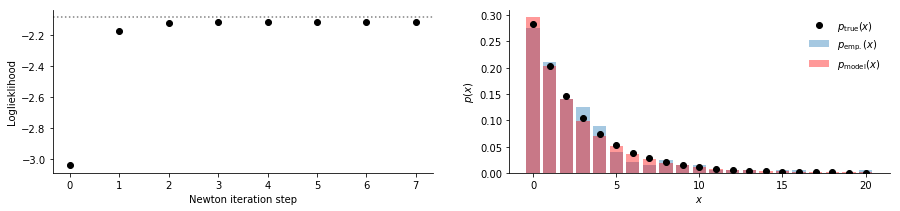

In [5]:
n_outcomes = 21
n_observations = 200
mu = 3.

# The true distribution is an exponential distribution
x = np.arange(n_outcomes)
p = 1/mu * np.exp(-x/mu)
p /= p.sum()

# Get a sample of n_observations from the true distribution
sample = sampleDistribution(p, n_observations)

# Get the response patterns and the model terms
patterns = generateResponsePatterns(x, sample.shape[1])
model_terms, term_tags = generateModelTerms(patterns, order=2)

# Empirical pattern probabilitites
p_emp = getEmpiricalDistribution(sample, patterns)

# Fit the maximum entropy model
p_model, lambdas, log_lik = fitMaxEntropyModel(model_terms, p_emp, term_tags)

# Plot results
plotModelFit(p_emp, p_model, x, log_lik)

#### Normal distribution

                x1    x1x1
Empirical    6.965  60.195
Model        6.965  60.195


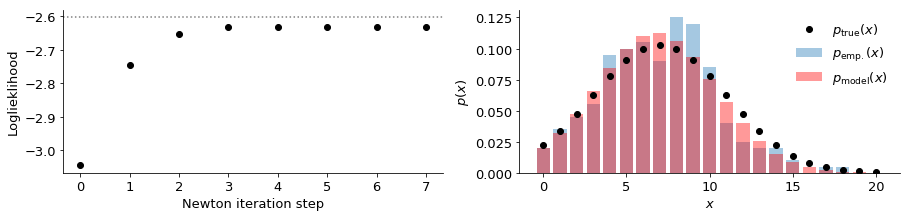

In [38]:
n_outcomes = 21
n_observations = 200
mu = 7.
sigma = 4.

# The true distribution is an normal distribution
x = np.arange(n_outcomes)
p = np.exp(-(x-mu)**2/(2*sigma**2))
p /= p.sum()

# Get a sample of n_observations from the true distribution
sample = sampleDistribution(p, n_observations)

# Get the response patterns and the model terms
patterns = generateResponsePatterns(x, sample.shape[1])
model_terms, term_tags = generateModelTerms(patterns, order=2)

# Empirical pattern probabilitites
p_emp = getEmpiricalDistribution(sample, patterns)

# Fit the maximum entropy model
p_model, lambdas, log_lik = fitMaxEntropyModel(model_terms, p_emp, term_tags)

# Plot results
plotModelFit(p_emp, p_model, x, log_lik)

#### Two-dimensional normal distribution

                x1      x2    x1x1    x1x2    x2x2
Empirical   10.014   9.974 110.274 107.405 109.490
Model       10.014   9.974 110.274 107.405 109.490


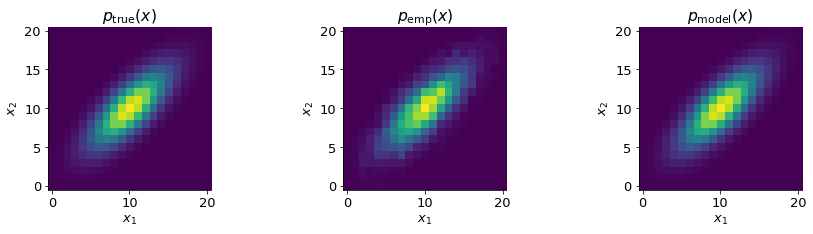

In [45]:
n_outcomes = 21
n_observations = 10000
mu = (n_outcomes-1) / 2.*np.ones([2, 1])
var = 20.
cov = 15.

# Get the true probability distribution
cov_mat = np.array([[var, cov], [cov, var]])
[x1, x2,] = np.meshgrid(range(n_outcomes), range(n_outcomes))
p = np.zeros([n_outcomes, n_outcomes])
for i in range(n_outcomes**2):
    x_tmp = np.array([x1.ravel()[i]-mu[0], x2.ravel()[i]-mu[1]])
    p.ravel()[i] = np.exp(-1/2 * np.dot(x_tmp.T, np.dot(np.linalg.inv(cov_mat), x_tmp)))
p /= p.sum()

# Get a sample of n_observations from the true distribution
sample = sampleDistribution(p, n_observations)

# Get the response patterns and the model terms
patterns = generateResponsePatterns(np.arange(n_outcomes), sample.shape[1])
model_terms, term_tags = generateModelTerms(patterns, order=2)

# Empirical pattern probabilitites
p_emp = getEmpiricalDistribution(sample, patterns)

# Fit the maximum entropy model
p_model, lambdas, log_lik = fitMaxEntropyModel(model_terms, p_emp, term_tags)

# Plot results
plt.figure(figsize=(15, 3))
# Subplot 1
ax = plt.subplot(1, 3, 1)
ax.imshow(p)
ax.invert_yaxis()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('$p_\mathrm{true}(x)$')
# Subplot 2
ax = plt.subplot(1, 3, 2)
ax.imshow(p_emp.reshape(n_outcomes, n_outcomes))
ax.invert_yaxis()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('$p_\mathrm{emp}(x)$')
# Subplot 3
ax = plt.subplot(1, 3, 3)
ax.imshow(p_model.reshape(n_outcomes, n_outcomes))
ax.invert_yaxis()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('$p_\mathrm{model}(x)$');

#### Entropy for two-dimensional normal distribution

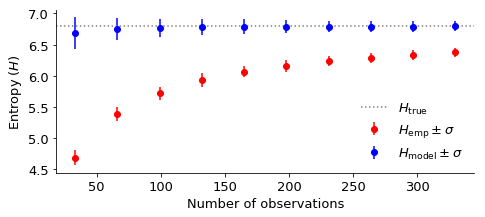

In [66]:
relevance_lim = 1e-2
n_dist_params = np.sum(p>relevance_lim)
sample_sizes = np.arange(1, 11)*n_dist_params
n_repetitions = 100

# Entropies
H_true = naiveEntropy(p)
H_emp = np.zeros([n_repetitions, sample_sizes.size])
H_model = np.zeros([n_repetitions, sample_sizes.size])

# Get the response patterns and the model terms
patterns = generateResponsePatterns(np.arange(n_outcomes), sample.shape[1])
model_terms, term_tags = generateModelTerms(patterns, order=2)

for size_idx in range(sample_sizes.size):
    
    n_observations = sample_sizes[size_idx]
    for rep_idx in range(n_repetitions):
        
        # Get a sample of n_observations from the true distribution
        sample = sampleDistribution(p, n_observations)

        # Empirical pattern probabilitites
        p_emp = getEmpiricalDistribution(sample, patterns)
        H_emp[rep_idx, size_idx] = naiveEntropy(p_emp)

        # Fit the maximum entropy model
        p_model, lambdas, log_lik = fitMaxEntropyModel(model_terms, p_emp, term_tags, verbose=0)
        H_model[rep_idx, size_idx] = naiveEntropy(p_model)
    
# Plotting
plt.figure(figsize=(7.5, 3))
plt.errorbar(sample_sizes, H_emp.mean(axis=0), yerr=H_emp.std(axis=0), fmt='ro', label='$H_\mathrm{emp}\pm\sigma$')
plt.errorbar(sample_sizes, H_model.mean(axis=0), yerr=H_model.std(axis=0), fmt='bo', label='$H_\mathrm{model}\pm\sigma$')
plt.axhline(H_true, ls=':', c='gray', label='$H_\mathrm{true}$')
plt.legend(loc=4, frameon=False)
plt.xlabel('Number of observations')
plt.ylabel('Entropy ($H$)');
